In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, special

In [2]:
unif = np.random.default_rng().uniform
normal = np.random.default_rng().normal
beta = np.random.default_rng().beta

In [3]:
def simulate_W(alpha, theta, n):
    Sk = np.array([beta(1 - alpha, theta + alpha * k) for k in range(1, n + 2)])
    Wk = np.zeros(n)
    for i in range(0, n):
        Wk[i] = Sk[i + 1] * np.prod(1 - Sk[0 : i + 1])
    return Wk

In [4]:
alpha = 0.5
theta = 0.5
n = 100

Wk = simulate_W(alpha, theta, n)

Wk.sum()

0.9977608787134395

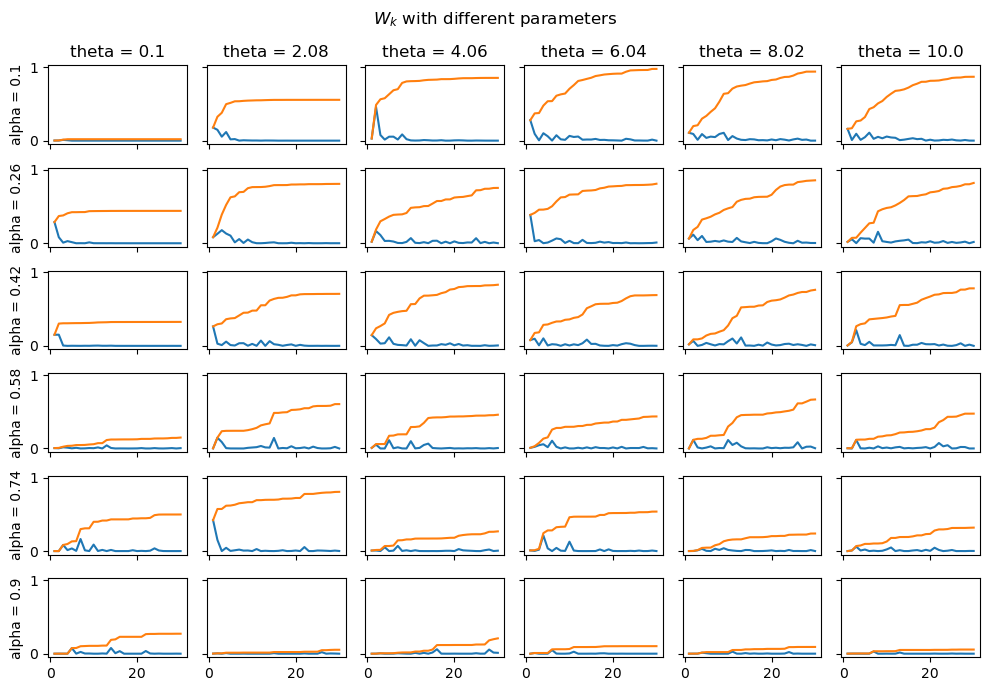

In [361]:
dim = 6
alpha_s = np.linspace(0.1,0.9,dim)
theta_s = np.linspace(0.1,10,dim)
n = 30
x = np.linspace(1, n, n)

fig, axes = plt.subplots(dim, dim, figsize = (10, 7), sharex = True, sharey = True)
plt.suptitle(f"$W_k$ with different parameters")
for i in range(0,dim):
    for j in range(0,dim):
        Wk = simulate_W(alpha_s[i], theta_s[j], n)
        Wk_cum = np.cumsum(Wk)
        axes[i,j].plot(x, Wk, label="Wk")
        axes[i,j].plot(x, Wk_cum, label="Wk acumulado")
        if i == 0:
            axes[i,j].set_title(f"theta = {round(theta_s[j], 3)}")
        if j == 0:
            axes[i,j].set_ylabel(f"alpha = {round(alpha_s[i], 3)}")

plt.tight_layout()
plt.show()

In [6]:
def Legendre_Pol(x, n):
    suma = 0
    for i in range(0, n + 1):
        _ = (x + 1)**(n - i) * (x - 1)**i
        _ *= (special.factorial(n) / (special.factorial(i) * special.factorial(n - i)))**2 
        suma += _
    return suma/(2**n)


In [346]:
alpha = 0.5
theta = 5
n = 50

x = np.linspace(-1,1,500)
Wk = simulate_W(alpha, theta, n)
y = np.zeros(500)
for i in range(0,n):
    y += Wk[i] * np.array(list(map(lambda x: Legendre_Pol(x, i), x)))

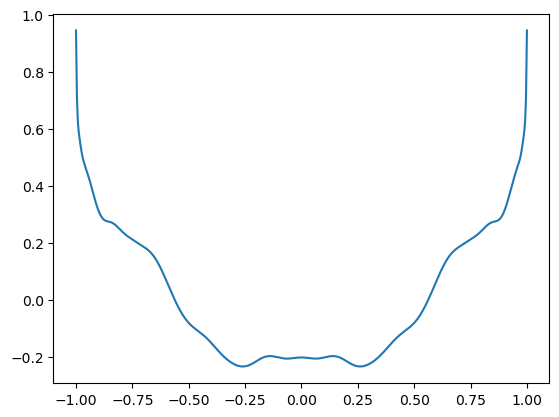

In [347]:
fig, axes = plt.subplots()

axes.plot(x,y+y[::-1])

plt.show()

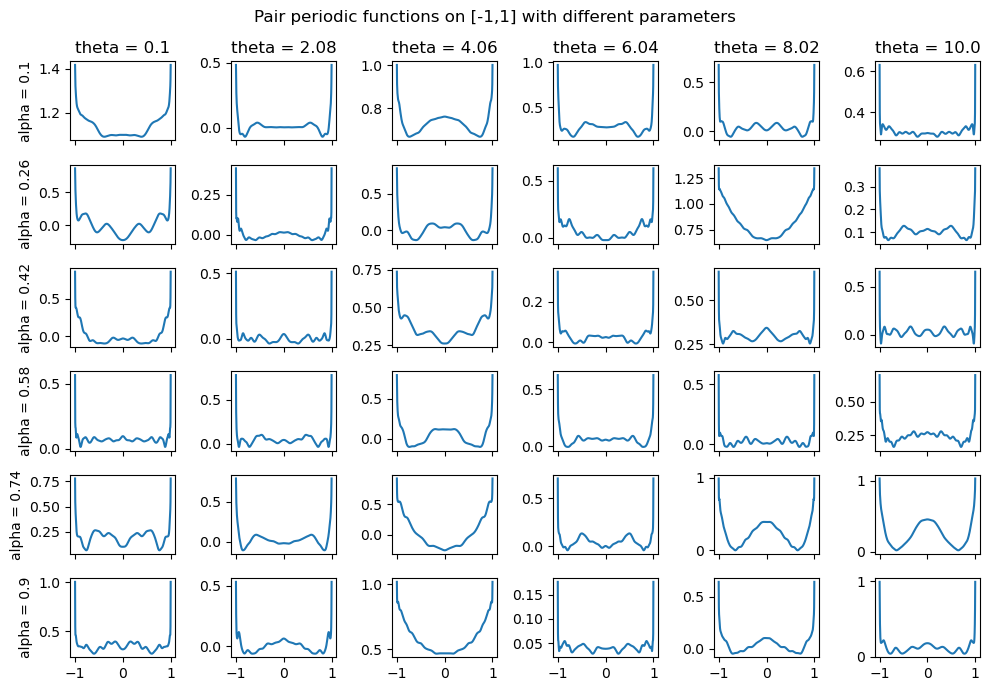

In [360]:
dim = 6
alpha_s = np.linspace(0.1,0.9,dim)
theta_s = np.linspace(0.1,10,dim)
n = 50
x = np.linspace(-1,1,500)

fig, axes = plt.subplots(dim, dim, figsize = (10, 7), sharex = True)
plt.suptitle(f"Pair periodic functions on [-1,1] with different parameters")
for i in range(0,dim):
    for j in range(0,dim):
        Wk = simulate_W(alpha, theta, n)
        y = np.zeros(500)
        for l in range(0,n):
            y += Wk[l] * np.array(list(map(lambda x: Legendre_Pol(x, l), x)))
        axes[i,j].plot(x, y+y[::-1], label="u")
        if i == 0:
            axes[i,j].set_title(f"theta = {round(theta_s[j], 3)}")
        if j == 0:
            axes[i,j].set_ylabel(f"alpha = {round(alpha_s[i], 3)}")

plt.tight_layout()
plt.show()

In [41]:
alpha = 0.5
theta = 5
n = 50

x = np.linspace(0,1,500)
Wk = simulate_W(alpha, theta, n)
y = np.zeros(500)

for i in range(0,n):
    y += Wk[i] * np.array(list(map(lambda x: Legendre_Pol((2 * x - 1), i), x)))

z = np.cumsum(y - y.min())/500



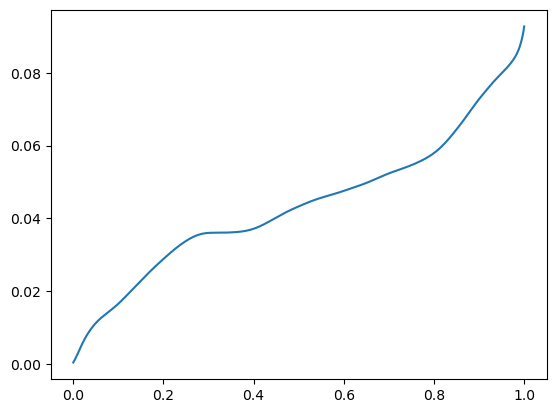

In [42]:
fig, axes = plt.subplots()

axes.plot(x,z)

plt.show()

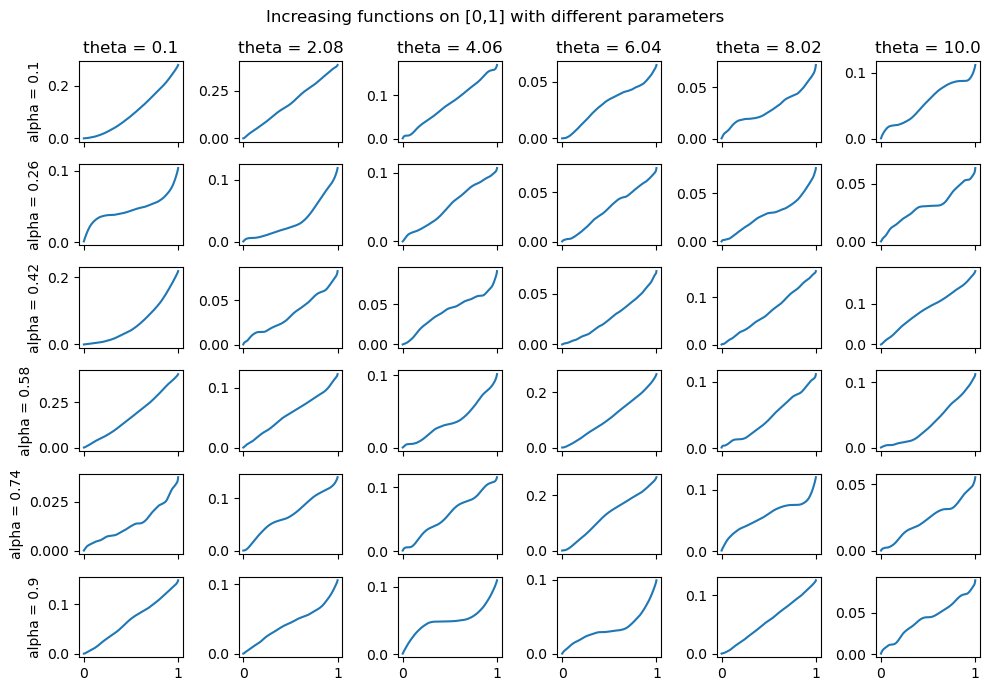

In [43]:
dim = 6
alpha_s = np.linspace(0.1,0.9,dim)
theta_s = np.linspace(0.1,10,dim)
n = 50
x = np.linspace(0,1,500)

fig, axes = plt.subplots(dim, dim, figsize = (10, 7), sharex = True)
plt.suptitle(f"Increasing functions on [0,1] with different parameters")
for i in range(0,dim):
    for j in range(0,dim):
        Wk = simulate_W(alpha, theta, n)
        y = np.zeros(500)
        for l in range(0,n):
            y += Wk[l] * np.array(list(map(lambda x: Legendre_Pol(2 * x - 1, l), x)))
        z = np.cumsum(y - y.min())/500
        axes[i,j].plot(x, z, label="u")
        if i == 0:
            axes[i,j].set_title(f"theta = {round(theta_s[j], 3)}")
        if j == 0:
            axes[i,j].set_ylabel(f"alpha = {round(alpha_s[i], 3)}")


plt.tight_layout()
plt.show()